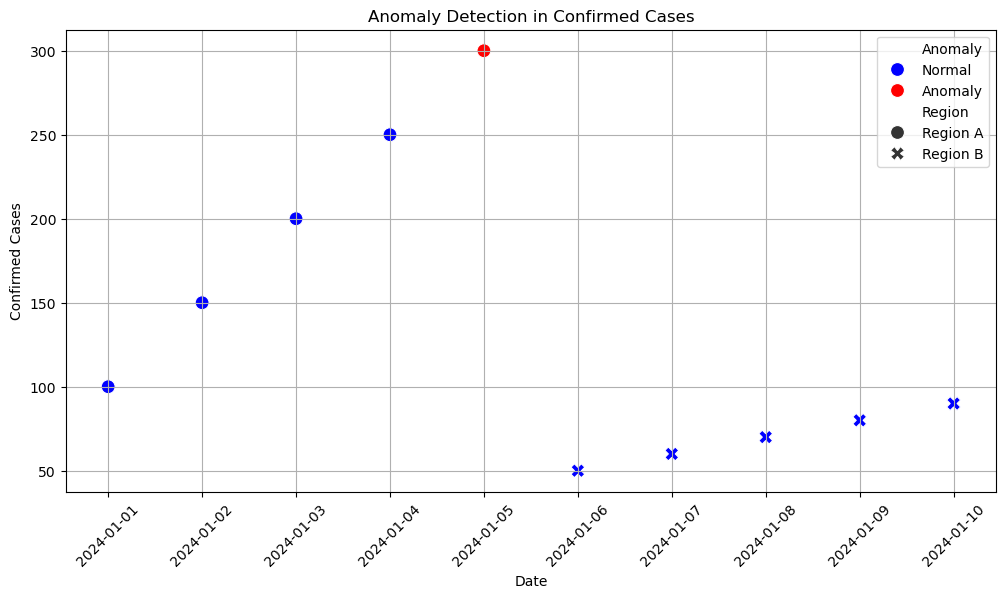

        Date    Region  Confirmed Cases  Recovered Cases  Deaths  \
0 2024-01-01  Region A              100               50       5   
1 2024-01-02  Region A              150               80       7   
2 2024-01-03  Region A              200              120      10   
3 2024-01-04  Region A              250              150      12   
4 2024-01-05  Region A              300              200      15   
5 2024-01-06  Region B               50               30       2   
6 2024-01-07  Region B               60               40       3   
7 2024-01-08  Region B               70               50       4   
8 2024-01-09  Region B               80               60       5   
9 2024-01-10  Region B               90               70       6   

   Rolling Confirmed  Rolling Recovered  Rolling Deaths  Anomaly  
0              100.0          50.000000        5.000000   Normal  
1              125.0          65.000000        6.000000   Normal  
2              150.0          83.333333        7.3

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import IsolationForest 

# Example COVID-19 dataset 
data = { 
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'), 
    'Region': ['Region A']*5 + ['Region B']*5, 
    'Confirmed Cases': [100, 150, 200, 250, 300, 50, 60, 70, 80, 90], 
    'Recovered Cases': [50, 80, 120, 150, 200, 30, 40, 50, 60, 70], 
    'Deaths': [5, 7, 10, 12, 15, 2, 3, 4, 5, 6] 
} 

# Convert dictionary into a pandas DataFrame 
df = pd.DataFrame(data) 

# Calculate rolling averages (3-day window for example) 
df['Rolling Confirmed'] = (
    df.groupby('Region')['Confirmed Cases']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

df['Rolling Recovered'] = (
    df.groupby('Region')['Recovered Cases']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

df['Rolling Deaths'] = (
    df.groupby('Region')['Deaths']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

# Prepare data for anomaly detection 
features = ['Confirmed Cases', 'Recovered Cases', 'Deaths']  # Using raw features for simplicity
df_for_model = df[features] 

# Initialize IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed 
df['Anomaly'] = iso_forest.fit_predict(df_for_model) 

# Map anomaly values to more intuitive labels 
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'}) 

# Visualize the results 
plt.figure(figsize=(12, 6)) 
sns.scatterplot( 
    data=df, 
    x='Date', 
    y='Confirmed Cases', 
    hue='Anomaly', 
    style='Region', 
    palette={'Normal': 'blue', 'Anomaly': 'red'}, 
    s=100 
) 
plt.title('Anomaly Detection in Confirmed Cases') 
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show() 

# Print the DataFrame to verify anomalies 
print(df)